## Part 3.2 - 3.3 Data Processing
#### As mentioned in file 'Data_Processing', the missing data 'recovery if default' and 'total recovery principal if default' will be manually assigned here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_backup = pd.read_csv('credit_risk_dataset_preprocessed.csv', index_col=0)

In [3]:
credit_data = data_backup.copy()

In [4]:
pd.options.display.max_columns = None

In [5]:
pd.options.display.max_rows = 100

In [6]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


For simplicity and lack of detailed information reasons, I will use the loan_status = 1 to represent the defaulted accounts.

In [7]:
credit_data_default = credit_data[credit_data['loan_status'] == 1]

In [8]:
credit_data_default.shape

(7108, 32)

In [9]:
credit_data_default.isnull().sum()

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
person_home_ownership:MORTGAGE    0
person_home_ownership:OTHER       0
person_home_ownership:OWN         0
person_home_ownership:RENT        0
loan_grade:A                      0
loan_grade:B                      0
loan_grade:C                      0
loan_grade:D                      0
loan_grade:E                      0
loan_grade:F                      0
loan_grade:G                      0
cb_person_default_on_file:N       0
cb_person_default_on_file:Y       0
loan_intent:DEBTCONSOLIDATION     0
loan_intent:EDUCATION             0
loan_intent:HOMEIMPROVEMENT 

In [10]:
credit_data_default.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


#### Now, let's create a column of recovery amount for each row. I will first random select 50% of the data to set the recovery amount as 0. Then, for the rest of the data, I will assign a random number between 0 and the total loan amount. The random numbers abide beta distribution (alpha = 2, beta = 5), to the proportion of the loan amount.

In [11]:
credit_data_default_LGD_1 = credit_data_default.sample(frac=0.5, random_state=42)

In [12]:
credit_data_default_LGD_0 = credit_data_default[~credit_data_default.isin(credit_data_default_LGD_1)].dropna()

In [13]:
credit_data_default.shape

(7108, 32)

In [14]:
credit_data_default_LGD_0.shape

(3554, 32)

In [15]:
credit_data_default_LGD_1.shape

(3554, 32)

In [16]:
credit_data_default_LGD_0['recovery'] = 0.0

In [17]:
credit_data_default_LGD_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 32556
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      3554 non-null   float64
 1   person_income                   3554 non-null   float64
 2   person_home_ownership           3554 non-null   object 
 3   person_emp_length               3554 non-null   float64
 4   loan_intent                     3554 non-null   object 
 5   loan_grade                      3554 non-null   object 
 6   loan_amnt                       3554 non-null   float64
 7   loan_int_rate                   3554 non-null   float64
 8   loan_status                     3554 non-null   float64
 9   loan_percent_income             3554 non-null   float64
 10  cb_person_default_on_file       3554 non-null   object 
 11  cb_person_cred_hist_length      3554 non-null   float64
 12  person_home_ownership:MORTGAGE  3

In [18]:
credit_data_default_LGD_1['recovery'] = round(credit_data_default_LGD_1['loan_amnt'] * np.random.beta(2,5,credit_data_default_LGD_1.shape[0]))

In [19]:
credit_data_default_LGD_1.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,recovery
21472,33,19200,RENT,0.0,PERSONAL,B,6000,10.65,1,0.31,N,6,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1994.0
18804,27,27000,OWN,0.0,EDUCATION,G,11500,20.11,1,0.43,N,9,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,3491.0
19105,27,15600,RENT,1.0,HOMEIMPROVEMENT,D,2250,18.25,1,0.14,N,6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,357.0
20561,28,88000,RENT,3.0,PERSONAL,B,10000,10.65,1,0.11,N,9,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1516.0
16782,25,49000,RENT,1.0,PERSONAL,D,12000,13.49,1,0.24,N,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,2201.0
19863,28,41500,RENT,3.0,MEDICAL,D,11000,15.33,1,0.27,Y,5,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,3662.0
23005,30,35600,RENT,0.0,EDUCATION,D,8000,14.59,1,0.22,N,9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,3743.0
548,26,42000,RENT,0.0,MEDICAL,F,21000,17.26,1,0.50,Y,4,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,4761.0
30835,36,60000,MORTGAGE,3.0,DEBTCONSOLIDATION,D,13000,14.11,1,0.22,Y,14,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,3984.0
15479,24,128000,MORTGAGE,7.0,DEBTCONSOLIDATION,D,18000,17.27,1,0.14,Y,2,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,6402.0


In [20]:
credit_data_default_LGD = pd.concat([credit_data_default_LGD_1, credit_data_default_LGD_0])

In [21]:
credit_data_default_LGD['recovery'].describe()

count     7108.000000
mean      1541.338070
std       2549.335145
min          0.000000
25%          0.000000
50%          5.000000
75%       2188.750000
max      23782.000000
Name: recovery, dtype: float64

#### Dependent Variables: LGD

In [22]:
credit_data_default_LGD['recovery_rate'] = credit_data_default_LGD['recovery'] / credit_data_default_LGD['loan_amnt']

In [23]:
credit_data_default_LGD['recovery_rate'].describe()

count    7108.000000
mean        0.142120
std         0.181552
min         0.000000
25%         0.000000
50%         0.001333
75%         0.263644
max         0.879467
Name: recovery_rate, dtype: float64

(array([3.572e+03, 5.400e+01, 7.200e+01, 8.800e+01, 1.120e+02, 1.250e+02,
        1.470e+02, 1.170e+02, 1.400e+02, 1.480e+02, 1.440e+02, 1.570e+02,
        1.630e+02, 1.430e+02, 1.510e+02, 1.550e+02, 1.250e+02, 1.330e+02,
        1.360e+02, 1.110e+02, 1.150e+02, 1.020e+02, 1.150e+02, 8.200e+01,
        7.800e+01, 7.500e+01, 6.700e+01, 5.800e+01, 6.800e+01, 4.500e+01,
        4.600e+01, 5.000e+01, 3.900e+01, 3.500e+01, 2.600e+01, 3.000e+01,
        1.400e+01, 1.500e+01, 9.000e+00, 1.400e+01, 1.000e+01, 6.000e+00,
        5.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00]),
 array([0.        , 0.01758933, 0.03517867, 0.052768  , 0.07035733,
        0.08794667, 0.105536  , 0.12312533, 0.14071467, 0.158304  ,
        0.17589333, 0.19348267, 0.211072  , 0.22866133, 0.24625067,
        0.26384   , 0.28142933, 0.29901867, 0.316608  , 0.33419733,
        0.35178667, 0.369376  , 0.38696533, 0.40455467, 0.422144  ,
        0.43973333, 0.45732267, 0.47

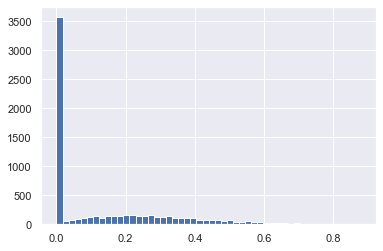

In [24]:
plt.hist(credit_data_default_LGD['recovery_rate'], bins=50)

In [25]:
credit_data_default_LGD['recovery_rate_0_1'] = np.where(credit_data_default_LGD['recovery_rate'] == 0, 0 ,1)

'recovery_rate' is the dependent variable of LGD.

### Dependent Variables: EAD

We will compute the credit conversion factor, which is the amount not paid devided by the total loan amount.

#### Similarly to LGD model, we create the total recovery principal for each input. The number will be randonly selected between 0 and to total loan amount. Please note that this is a different case from the LGD model. And those two cases are for demonstrative purpose. At last, we will pretend them to be one case to cal.

The random numbers abide (1-x), where x is a beta distribution (alpha = 2, beta=5), to the proportion of the total loan amount.

In [26]:
credit_data_default_LGD_EAD = credit_data_default_LGD.copy()

In [27]:
credit_data_default_LGD_EAD['total_rec_prcp'] = credit_data_default_LGD_EAD['loan_amnt'] - round(credit_data_default_LGD_EAD['loan_amnt'] * (1 - np.random.beta(2,5,credit_data_default_LGD_EAD.shape[0])))

In [28]:
credit_data_default_LGD_EAD.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,recovery,recovery_rate,recovery_rate_0_1,total_rec_prcp
21472,33.0,19200.0,RENT,0.0,PERSONAL,B,6000.0,10.65,1.0,0.31,N,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1994.0,0.332333,1,3333.0
18804,27.0,27000.0,OWN,0.0,EDUCATION,G,11500.0,20.11,1.0,0.43,N,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3491.0,0.303565,1,2578.0
19105,27.0,15600.0,RENT,1.0,HOMEIMPROVEMENT,D,2250.0,18.25,1.0,0.14,N,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,357.0,0.158667,1,484.0
20561,28.0,88000.0,RENT,3.0,PERSONAL,B,10000.0,10.65,1.0,0.11,N,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1516.0,0.151600,1,791.0
16782,25.0,49000.0,RENT,1.0,PERSONAL,D,12000.0,13.49,1.0,0.24,N,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2201.0,0.183417,1,1418.0
19863,28.0,41500.0,RENT,3.0,MEDICAL,D,11000.0,15.33,1.0,0.27,Y,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3662.0,0.332909,1,2252.0
23005,30.0,35600.0,RENT,0.0,EDUCATION,D,8000.0,14.59,1.0,0.22,N,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3743.0,0.467875,1,3810.0
548,26.0,42000.0,RENT,0.0,MEDICAL,F,21000.0,17.26,1.0,0.50,Y,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4761.0,0.226714,1,6550.0
30835,36.0,60000.0,MORTGAGE,3.0,DEBTCONSOLIDATION,D,13000.0,14.11,1.0,0.22,Y,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3984.0,0.306462,1,2174.0
15479,24.0,128000.0,MORTGAGE,7.0,DEBTCONSOLIDATION,D,18000.0,17.27,1.0,0.14,Y,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6402.0,0.355667,1,1479.0


In [29]:
credit_data_default_LGD_EAD['CCF'] = (credit_data_default_LGD_EAD['loan_amnt'] - credit_data_default_LGD_EAD['total_rec_prcp']) / credit_data_default_LGD_EAD['loan_amnt']

In [30]:
credit_data_default_LGD_EAD['CCF'].describe()

count    7108.000000
mean        0.712946
std         0.161245
min         0.104833
25%         0.610760
50%         0.734583
75%         0.839475
max         0.998167
Name: CCF, dtype: float64

(array([  3.,   1.,   1.,   2.,   3.,  10.,   9.,  13.,   9.,  17.,  24.,
         29.,  39.,  36.,  37.,  51.,  64.,  62.,  70.,  92., 105., 107.,
        121., 126., 150., 171., 174., 191., 205., 218., 247., 268., 295.,
        271., 270., 288., 299., 283., 321., 307., 295., 347., 281., 261.,
        247., 219., 191., 147.,  95.,  36.]),
 array([0.10483333, 0.1227    , 0.14056667, 0.15843333, 0.1763    ,
        0.19416667, 0.21203333, 0.2299    , 0.24776667, 0.26563333,
        0.2835    , 0.30136667, 0.31923333, 0.3371    , 0.35496667,
        0.37283333, 0.3907    , 0.40856667, 0.42643333, 0.4443    ,
        0.46216667, 0.48003333, 0.4979    , 0.51576667, 0.53363333,
        0.5515    , 0.56936667, 0.58723333, 0.6051    , 0.62296667,
        0.64083333, 0.6587    , 0.67656667, 0.69443333, 0.7123    ,
        0.73016667, 0.74803333, 0.7659    , 0.78376667, 0.80163333,
        0.8195    , 0.83736667, 0.85523333, 0.8731    , 0.89096667,
        0.90883333, 0.9267    , 0.94456667, 0.

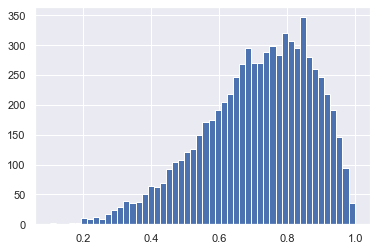

In [31]:
plt.hist(credit_data_default_LGD_EAD['CCF'], bins=50)

## Part 4.2.1 LDG Modeling - Stage 1

### Stage 1 -- Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_LGD_stage_1_train, X_LGD_stage_1_test, y_LGD_stage_1_train, y_LGD_stage_1_test = train_test_split(credit_data_default_LGD_EAD.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1), credit_data_default_LGD_EAD['recovery_rate_0_1'], test_size=0.2, random_state=42)

In [34]:
features_all = ['person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:RENT',
'person_home_ownership:OTHER',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age', 
'person_income', 
'person_emp_length', 
'loan_amnt', 
'loan_int_rate', 
]

In [35]:
reference_cat = ['person_home_ownership:RENT',
'cb_person_default_on_file:Y',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION']

In [36]:
X_LGD_stage_1_train = X_LGD_stage_1_train[features_all]

In [37]:
X_LGD_stage_1_train = X_LGD_stage_1_train.drop(reference_cat, axis=1)

In [38]:
X_LGD_stage_1_train.columns

Index(['person_home_ownership:OWN', 'person_home_ownership:MORTGAGE',
       'person_home_ownership:OTHER', 'cb_person_default_on_file:N',
       'loan_grade:A', 'loan_grade:B', 'loan_grade:C', 'loan_grade:D',
       'loan_grade:E', 'loan_grade:F', 'loan_intent:EDUCATION',
       'loan_intent:HOMEIMPROVEMENT', 'loan_intent:MEDICAL',
       'loan_intent:PERSONAL', 'loan_intent:VENTURE', 'person_age',
       'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate'],
      dtype='object')

### Estimating the LGD Model

In [39]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self, X, y):
        self.model.fit(X, y)
        demon = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        demon = np.tile(demon, (X.shape[1],1)).T
        F_ij = np.dot((X / demon).T, X) + 0.0001
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [40]:
reg_lgd_st_1 = LogisticRegression_with_p_values(max_iter=1000)

In [41]:
reg_lgd_st_1.fit(X_LGD_stage_1_train, y_LGD_stage_1_train)

In [42]:
feature_name = X_LGD_stage_1_train.columns.values

In [43]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-1.333927e-10,NaN
1,person_home_ownership:OWN,3.903223e-11,1.000000
2,person_home_ownership:MORTGAGE,-7.133628e-12,1.000000
3,person_home_ownership:OTHER,3.731009e-11,1.000000
4,cb_person_default_on_file:N,-1.072998e-10,1.000000
5,loan_grade:A,5.957059e-11,1.000000
6,loan_grade:B,-5.009923e-10,1.000000
7,loan_grade:C,4.924431e-11,1.000000
8,loan_grade:D,2.200668e-10,1.000000
9,loan_grade:E,-8.749486e-11,1.000000


## Part 5.2.1 LDG Evaluation - Stage 1

Testing the model

In [44]:
X_LGD_stage_1_test = X_LGD_stage_1_test[features_all]

In [45]:
X_LGD_stage_1_test = X_LGD_stage_1_test.drop(reference_cat, axis=1)

In [46]:
y_hat_lgd_stage_1 = reg_lgd_st_1.model.predict(X_LGD_stage_1_test)

In [47]:
y_hat_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(X_LGD_stage_1_test)

In [48]:
y_hat_proba_lgd_stage_1

array([[0.50306573, 0.49693427],
       [0.50194432, 0.49805568],
       [0.49868213, 0.50131787],
       ...,
       [0.5021008 , 0.4978992 ],
       [0.49703092, 0.50296908],
       [0.50386174, 0.49613826]])

In [49]:
y_hat_proba_lgd_stage_1 = y_hat_proba_lgd_stage_1[:][:,1]

In [50]:
y_hat_proba_lgd_stage_1

array([0.49693427, 0.49805568, 0.50131787, ..., 0.4978992 , 0.50296908,
       0.49613826])

Assess accuracy

In [51]:
y_LGD_stage_1_test_temp = y_LGD_stage_1_test

In [52]:
y_LGD_stage_1_test_temp.reset_index(drop = True, inplace=True)

In [53]:
df_actual_predicted_probs = pd.concat([y_LGD_stage_1_test_temp, pd.DataFrame(y_hat_proba_lgd_stage_1)], axis=1)

In [54]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_proba_lgd_stage_1']

In [55]:
df_actual_predicted_probs.index = X_LGD_stage_1_test.index

In [56]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_proba_lgd_stage_1
12189,0,0.496934
6762,0,0.498056
7459,0,0.501318
10477,0,0.498136
985,0,0.500134


In [57]:
tr = 0.5
df_actual_predicted_probs['y_hat_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_proba_lgd_stage_1'] > tr, 1, 0)

In [58]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,387,322
1,377,336


In [59]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.272152,0.226442
1,0.265120,0.236287


In [60]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.5084388185654009

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve

In [62]:
    fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC Curve')

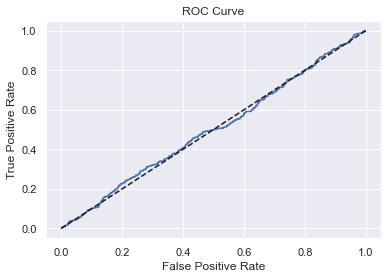

In [63]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color= 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [64]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_proba_lgd_stage_1'])
AUROC

0.5028752742242101

### Saving the model

In [65]:
import pickle

In [66]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.save', 'wb'))

## Part 4.2.2 LDG Modeling - Stage 2

### Stage 2 -- Linear Regression

In [67]:
credit_data_lgd_stage_2 = credit_data_default_LGD_EAD[credit_data_default_LGD_EAD['recovery_rate_0_1']==1]

In [68]:
X_LGD_stage_2_train, X_LGD_stage_2_test, y_LGD_stage_2_train, y_LGD_stage_2_test = train_test_split(credit_data_default_LGD_EAD.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1), credit_data_default_LGD_EAD['recovery_rate'], test_size=0.2, random_state=42)

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=1, positive=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive
              
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [71]:
X_LGD_stage_2_train = X_LGD_stage_2_train[features_all]

In [72]:
X_LGD_stage_2_train = X_LGD_stage_2_train.drop(reference_cat, axis=1)

In [73]:
reg_lgd_st_2 = LinearRegression()

In [74]:
X_LGD_stage_2_train.shape

(5686, 20)

In [75]:
y_LGD_stage_2_train.shape

(5686,)

In [76]:
reg_lgd_st_2.fit(X_LGD_stage_2_train, y_LGD_stage_2_train)

LinearRegression()

In [77]:
feature_name = X_LGD_stage_2_train.columns.values

In [78]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,1.477848e-01,NaN
1,person_home_ownership:OWN,4.340325e-03,0.776997
2,person_home_ownership:MORTGAGE,-4.081904e-03,0.511037
3,person_home_ownership:OTHER,3.037237e-02,0.396790
4,cb_person_default_on_file:N,1.444166e-03,0.815517
5,loan_grade:A,-8.115126e-03,0.564307
6,loan_grade:B,-1.034091e-02,0.488155
7,loan_grade:C,-1.307638e-02,0.408155
8,loan_grade:D,-1.011619e-02,0.545588
9,loan_grade:E,-1.181213e-02,0.539458


A coefficient shows the change in the dependent variable that is going to occur as a result of a unit change in the respective independent variable.

## Part 5.2.2 LDG Model Evaluation - Stage 2

In [79]:
X_LGD_stage_2_test = X_LGD_stage_2_test[features_all]

In [80]:
X_LGD_stage_2_test = X_LGD_stage_2_test.drop(reference_cat, axis=1)

In [81]:
y_hat_lgd_stage_2 = reg_lgd_st_2.predict(X_LGD_stage_2_test)

In [82]:
y_LGD_stage_2_test_temp = y_LGD_stage_2_test

In [83]:
y_LGD_stage_2_test_temp = y_LGD_stage_2_test_temp.reset_index(drop=True)

In [84]:
pd.concat([y_LGD_stage_2_test_temp, pd.DataFrame(y_hat_lgd_stage_2)], axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.044608
0,0.044608,1.000000


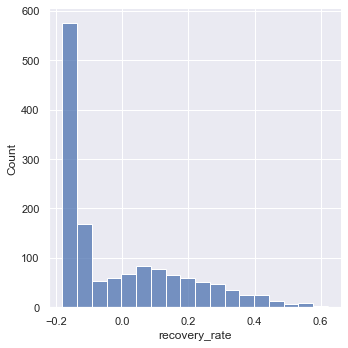

In [85]:
sns.displot(y_LGD_stage_2_test - y_hat_lgd_stage_2)

In [86]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.save', 'wb'))

### Combine 2 stages

In [87]:
y_hat_lgd_stage_2_all = reg_lgd_st_2.predict(X_LGD_stage_1_test)

In [88]:
y_hat_lgd_stage_2_all

array([0.14377611, 0.14854878, 0.1471638 , ..., 0.14219246, 0.13186542,
       0.14037042])

In [89]:
y_hat_lgd = y_hat_lgd_stage_1 * y_hat_lgd_stage_2_all

In [90]:
pd.DataFrame(y_hat_lgd).describe()

,0
count,1422.000000
mean,0.065986
std,0.071262
min,0.000000
25%,0.000000
50%,0.000000
75%,0.142055
max,0.178420


In [91]:
# if necessary

#y_hat_lgd = np.where(y_hat_lgd<0, 0, y_hat_lgd)
#y_hat_lgd = np.where(y_hat_lgd>1, 1, y_hat_lgd)

## Part 4.3 EAD Modeling

In [92]:
X_EAD_train, X_EAD_test, y_EAD_train, y_EAD_test = train_test_split(credit_data_default_LGD_EAD.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1), credit_data_default_LGD_EAD['CCF'], test_size=0.2, random_state=42)

In [93]:
X_EAD_train = X_EAD_train[features_all]

In [94]:
X_EAD_train = X_EAD_train.drop(reference_cat, axis=1)

In [95]:
reg_ead = LinearRegression()

In [96]:
reg_ead.fit(X_EAD_train, y_EAD_train)

LinearRegression()

In [97]:
feature_name = X_EAD_train.columns.values

In [98]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,7.019933e-01,NaN
1,person_home_ownership:OWN,7.084597e-03,0.599920
2,person_home_ownership:MORTGAGE,-2.058189e-03,0.706932
3,person_home_ownership:OTHER,-3.194787e-02,0.311903
4,cb_person_default_on_file:N,5.968303e-03,0.274000
5,loan_grade:A,-9.173423e-03,0.459725
6,loan_grade:B,-1.378916e-02,0.294286
7,loan_grade:C,-3.644898e-03,0.793641
8,loan_grade:D,-7.206401e-03,0.625216
9,loan_grade:E,1.099094e-02,0.517117


## Part 5.3 EAD Model Evaluation

In [99]:
X_EAD_test = X_EAD_test[features_all]

In [100]:
X_EAD_test = X_EAD_test.drop(reference_cat, axis=1)

In [101]:
y_hat_ead = reg_ead.predict(X_EAD_test)

In [102]:
y_EAD_test_temp = y_EAD_test

In [103]:
y_EAD_test_temp = y_EAD_test_temp.reset_index(drop=True)

In [104]:
pd.concat([y_EAD_test_temp, pd.DataFrame(y_hat_ead)], axis=1).corr()

,CCF,0
CCF,1.000000,-0.052283
0,-0.052283,1.000000


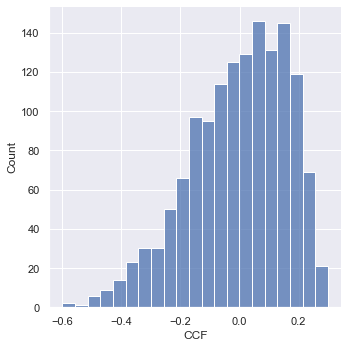

In [105]:
sns.displot(y_EAD_test - y_hat_ead)

In [106]:
pd.DataFrame(y_hat_ead).describe()

,0
count,1422.000000
mean,0.714105
std,0.009810
min,0.669168
25%,0.707278
50%,0.713181
75%,0.720076
max,0.773259


In [107]:
# if necessary

#y_hat_ead = np.where(y_hat_ead<0, 0, y_hat_ead)
#y_hat_ead = np.where(y_hat_ead>1, 1, y_hat_ead)

categories:
    
'person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:RENT',
'person_home_ownership:OTHER',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age', 
'person_income', 
'person_emp_length', 
'loan_amnt', 
'loan_int_rate', 
'loan_percent_income:', 


reference categories:

'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',


## Part 6. Deployment

### Data Gathering

In [108]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [109]:
credit_data_default_LGD_EAD.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,recovery,recovery_rate,recovery_rate_0_1,total_rec_prcp,CCF
21472,33.0,19200.0,RENT,0.0,PERSONAL,B,6000.0,10.65,1.0,0.31,N,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1994.0,0.332333,1,3333.0,0.444500
18804,27.0,27000.0,OWN,0.0,EDUCATION,G,11500.0,20.11,1.0,0.43,N,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3491.0,0.303565,1,2578.0,0.775826
19105,27.0,15600.0,RENT,1.0,HOMEIMPROVEMENT,D,2250.0,18.25,1.0,0.14,N,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,357.0,0.158667,1,484.0,0.784889
20561,28.0,88000.0,RENT,3.0,PERSONAL,B,10000.0,10.65,1.0,0.11,N,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1516.0,0.151600,1,791.0,0.920900
16782,25.0,49000.0,RENT,1.0,PERSONAL,D,12000.0,13.49,1.0,0.24,N,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2201.0,0.183417,1,1418.0,0.881833


In [110]:
credit_data.shape

(32576, 32)

In [111]:
credit_data_default_LGD_EAD.shape

(7108, 37)

In [112]:
credit_data_non_default = credit_data[credit_data['loan_status'] == 0]

In [113]:
credit_data_non_default.shape

(25468, 32)

In [114]:
credit_data_non_default.shape[0] + credit_data_default_LGD_EAD.shape[0] == credit_data.shape[0]

True

In [115]:
credit_data_non_default.loc[:, 'recovery'] = 0
credit_data_non_default.loc[:, 'recovery_rate'] = 0
credit_data_non_default.loc[:, 'recovery_rate_0_1'] = 0
credit_data_non_default.loc[:, 'total_rec_prcp'] = 0
credit_data_non_default.loc[:, 'CCF'] = 0

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [116]:
credit_data_non_default.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,recovery,recovery_rate,recovery_rate_0_1,total_rec_prcp,CCF
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [117]:
credit_data_non_default.shape

(25468, 37)

In [118]:
credit_data_final = pd.concat([credit_data_non_default, credit_data_default_LGD_EAD])

In [119]:
credit_data_final.shape

(32576, 37)

In [120]:
credit_data_final = credit_data_final[features_all]

In [121]:
credit_data_final = credit_data_final.drop(reference_cat, axis=1)

### LGD

In [122]:
credit_data['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(credit_data_final)

In [123]:
credit_data['recovery_rate_st_2'] = reg_lgd_st_2.predict(credit_data_final)

In [124]:
credit_data['recovery_rate'] = credit_data['recovery_rate_st_1'] * credit_data['recovery_rate_st_2']

In [125]:
credit_data['recovery_rate'] = np.where(credit_data['recovery_rate'] < 0, 0, credit_data['recovery_rate'])
credit_data['recovery_rate'] = np.where(credit_data['recovery_rate'] > 1, 1, credit_data['recovery_rate'])

In [126]:
credit_data['LDG'] = 1 - credit_data['recovery_rate'] 

In [127]:
credit_data['LDG'].describe() 

count    32576.000000
mean         0.898538
std          0.062745
min          0.816331
25%          0.857656
50%          0.862921
75%          1.000000
max          1.000000
Name: LDG, dtype: float64

### EAD

In [128]:
credit_data['CCF'] = reg_ead.predict(credit_data_final)

In [129]:
credit_data['CCF'] = np.where(credit_data['CCF'] < 0, 0, credit_data['CCF'])
credit_data['CCF'] = np.where(credit_data['CCF'] > 1, 1, credit_data['CCF'])

In [130]:
credit_data['EAD'] = credit_data['CCF'] * credit_data_final['loan_amnt']

In [131]:
credit_data['EAD'].describe()

count    32576.000000
mean      6838.900069
std       4511.898555
min        351.869858
25%       3543.240432
50%       5729.879017
75%       8783.536851
max      26052.654518
Name: EAD, dtype: float64

### PD

In [132]:
inputs_train = pd.read_csv('inputs_train.csv')
inputs_test = pd.read_csv('inputs_test.csv')

In [133]:
inputs_PD = pd.concat([inputs_test, inputs_train], axis=0)

In [134]:
inputs_PD.shape

(32576, 69)

In [135]:
inputs_PD.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,person_home_ownership:OTHER_RENT,person_age:<=22,person_age:23-28,person_age:29-33,person_age:34-37,person_age:>=38,person_income_factor,person_income:<=20K,person_income:20K-34K,person_income:34K-52.5K,person_income:52.5K-66.5K,person_income:66.5K-75.7K,person_income:>75.7K,person_emp_length:<=2,person_emp_length:3-7,person_emp_length:8-10,person_emp_length:>10,loan_amnt_factor,loan_amnt:<=3260,loan_amnt:3260-8090,loan_amnt:8090-12230,loan_amnt:12230-18440,loan_amnt:>18440,loan_int_rate_factor,loan_int_rate:<=6.488,loan_int_rate:6.488-9.692,loan_int_rate:9.692-10.76,loan_int_rate:10.76-13.964,loan_int_rate:13.964-15.388,loan_int_rate:15.388-17.88,loan_int_rate:>17.88,loan_percent_income_factor,loan_percent_income:<=13.3pct,loan_percent_income:13.3-16.6pct,loan_percent_income:16.6-29.9pct,loan_percent_income:29.9-31.5pct,loan_percent_income:>31.5pct
0,14451,25,107000,MORTGAGE,1.0,MEDICAL,A,1000,7.400000,0,0.01,N,4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,"(81760.0, 119640.0]",1,1,1,1,1,1,1,0,0,0,"(465.5, 1190.0]",1,0,0,0,0,"(7.378, 7.705]",0,1,0,0,0,0,0,"(-0.00067, 0.0134]",1,0,0,0,0
1,29639,40,34560,MORTGAGE,3.0,MEDICAL,B,10000,11.011695,0,0.29,N,12,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,"(4106.0, 43880.0]",1,1,1,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(10.969, 11.295]",0,0,0,1,0,0,0,"(0.281, 0.295]",0,0,1,0,0
2,11100,22,42000,RENT,6.0,MEDICAL,E,10000,16.320000,1,0.24,Y,4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,1,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(16.191, 16.518]",0,0,0,0,0,1,0,"(0.228, 0.241]",0,0,1,0,0
3,10428,21,28600,RENT,3.0,PERSONAL,C,10000,11.340000,1,0.35,Y,3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,0,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(11.295, 11.622]",0,0,0,1,0,0,0,"(0.348, 0.362]",0,0,0,0,1
4,12632,22,28000,RENT,4.0,EDUCATION,B,3000,10.590000,0,0.11,N,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,0,0,0,0,0,1,0,0,"(2570.0, 3260.0]",1,0,0,0,0,"(10.316, 10.642]",0,0,1,0,0,0,0,"(0.107, 0.121]",1,0,0,0,0


In [136]:
inputs_PD = inputs_PD.set_index('Unnamed: 0')

In [137]:
inputs_PD.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,person_home_ownership:OTHER_RENT,person_age:<=22,person_age:23-28,person_age:29-33,person_age:34-37,person_age:>=38,person_income_factor,person_income:<=20K,person_income:20K-34K,person_income:34K-52.5K,person_income:52.5K-66.5K,person_income:66.5K-75.7K,person_income:>75.7K,person_emp_length:<=2,person_emp_length:3-7,person_emp_length:8-10,person_emp_length:>10,loan_amnt_factor,loan_amnt:<=3260,loan_amnt:3260-8090,loan_amnt:8090-12230,loan_amnt:12230-18440,loan_amnt:>18440,loan_int_rate_factor,loan_int_rate:<=6.488,loan_int_rate:6.488-9.692,loan_int_rate:9.692-10.76,loan_int_rate:10.76-13.964,loan_int_rate:13.964-15.388,loan_int_rate:15.388-17.88,loan_int_rate:>17.88,loan_percent_income_factor,loan_percent_income:<=13.3pct,loan_percent_income:13.3-16.6pct,loan_percent_income:16.6-29.9pct,loan_percent_income:29.9-31.5pct,loan_percent_income:>31.5pct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14451,25,107000,MORTGAGE,1.0,MEDICAL,A,1000,7.400000,0,0.01,N,4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,"(81760.0, 119640.0]",1,1,1,1,1,1,1,0,0,0,"(465.5, 1190.0]",1,0,0,0,0,"(7.378, 7.705]",0,1,0,0,0,0,0,"(-0.00067, 0.0134]",1,0,0,0,0
29639,40,34560,MORTGAGE,3.0,MEDICAL,B,10000,11.011695,0,0.29,N,12,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,"(4106.0, 43880.0]",1,1,1,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(10.969, 11.295]",0,0,0,1,0,0,0,"(0.281, 0.295]",0,0,1,0,0
11100,22,42000,RENT,6.0,MEDICAL,E,10000,16.320000,1,0.24,Y,4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,1,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(16.191, 16.518]",0,0,0,0,0,1,0,"(0.228, 0.241]",0,0,1,0,0
10428,21,28600,RENT,3.0,PERSONAL,C,10000,11.340000,1,0.35,Y,3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,0,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(11.295, 11.622]",0,0,0,1,0,0,0,"(0.348, 0.362]",0,0,0,0,1
12632,22,28000,RENT,4.0,EDUCATION,B,3000,10.590000,0,0.11,N,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,0,0,0,0,0,1,0,0,"(2570.0, 3260.0]",1,0,0,0,0,"(10.316, 10.642]",0,0,1,0,0,0,0,"(0.107, 0.121]",1,0,0,0,0


In [138]:
features_all_PD = [ 'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'cb_person_default_on_file:Y', 
    'cb_person_default_on_file:N',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=13.3pct', 
    'loan_percent_income:13.3-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct']

In [146]:
ref_categories_PD = [
    'person_home_ownership:OTHER_RENT',
    'cb_person_default_on_file:Y',
    'cb_person_default_on_file:N',
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'person_age:<=22',
    'person_income:<=20K',
    'person_emp_length:<=2',
    'loan_amnt:>18440',
    'loan_int_rate:>17.88',
    'loan_percent_income:>31.5pct'
]

In [147]:
inputs_PD_temp = inputs_PD[features_all_PD]

In [148]:
inputs_PD_temp = inputs_PD_temp.drop(ref_categories_PD, axis=1)

In [149]:
inputs_PD_temp.shape

(32576, 39)

In [143]:
import pickle

In [144]:
reg_pd = pickle.load(open('pd_model.save','rb'))

In [151]:
credit_data['PD'] = reg_pd.model.predict_proba(inputs_PD_temp)[:][:,0]

In [152]:
credit_data['PD'].head()

0    0.031784
1    0.056757
2    0.773019
3    0.829364
4    0.101444
Name: PD, dtype: float64

In [153]:
credit_data['PD'].describe()

count    32576.000000
mean         0.218038
std          0.278410
min          0.000648
25%          0.033215
50%          0.080202
75%          0.275834
max          0.999812
Name: PD, dtype: float64

### Expected Loss

In [154]:
credit_data.shape

(32576, 39)

In [155]:
inputs_PD.shape

(32576, 68)

In [157]:
credit_data_new = pd.concat([credit_data, inputs_PD], axis=1)

In [158]:
credit_data_new ['EL'] = credit_data_new['PD'] * credit_data_new['LDG'] * credit_data_new['EAD']

In [159]:
credit_data_new['EL'].describe()

count    32576.000000
mean      1326.573199
std       2211.052049
min          0.872236
25%        146.111219
50%        424.238364
75%       1433.173920
max      25263.281687
Name: EL, dtype: float64

In [160]:
credit_data_new[['loan_amnt','PD','LDG','EAD','EL']].head(10)

,loan_amnt,loan_amnt,PD,LDG,EAD,EL
0,35000,35000,0.031784,0.847435,24825.872525,668.682872
1,1000,1000,0.056757,1.000000,710.430852,40.321584
2,5500,5500,0.773019,0.861737,3788.069630,2523.381378
3,35000,35000,0.829364,1.000000,24821.008317,20585.654160
4,35000,35000,0.101444,0.864540,24892.124198,2183.096342
5,2500,2500,0.145070,1.000000,1825.542916,264.831044
6,35000,35000,0.347798,0.851846,25261.358507,7484.183557
7,35000,35000,0.135439,0.849337,25200.413131,2898.895653
8,35000,35000,0.094704,1.000000,24952.680601,2363.124473
9,1600,1600,0.130458,0.855595,1128.412777,125.952174


In [161]:
credit_data_new['loan_amnt'].describe()

,loan_amnt,loan_amnt
count,32576.000000,32576.000000
mean,9589.117755,9589.117755
std,6321.886846,6321.886846
min,500.000000,500.000000
25%,5000.000000,5000.000000
50%,8000.000000,8000.000000
75%,12200.000000,12200.000000
max,35000.000000,35000.000000


In [162]:
credit_data_new['loan_amnt'].sum()

loan_amnt    312375100
loan_amnt    312375100
dtype: int64

In [163]:
credit_data_new['EL'].sum()

43214448.52320843

In [164]:
credit_data_new['EL'].sum() / credit_data_new['loan_amnt'].sum()

loan_amnt    0.138342
loan_amnt    0.138342
dtype: float64

over 10% leads to more conservative strategy